(720, 1280)


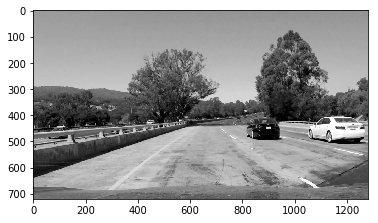

In [49]:
# -*- coding: utf-8 -*-
"""
Created on Wed Nov 28 10:59:48 2018

@author: Pranjal Vithlani
"""


import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image = mpimg.imread('test_images/test1.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray,cmap='gray')
print(gray.shape)


[[237 239 203 ...  31  34  45]
 [239 192 154 ... 101  71  28]
 [200 152 146 ... 134 127  88]
 ...
 [134 124 104 ...  85  85  99]
 [157 125 110 ...  93  95  97]
 [182 128 120 ...  83  81  59]]
[[239 241 209 ...  34  37  50]
 [241 199 164 ... 113  81  33]
 [207 162 157 ... 148 140 101]
 ...
 [142 132 111 ...  91  91 106]
 [164 133 117 ... 100 102 104]
 [188 136 128 ...  89  87  63]]


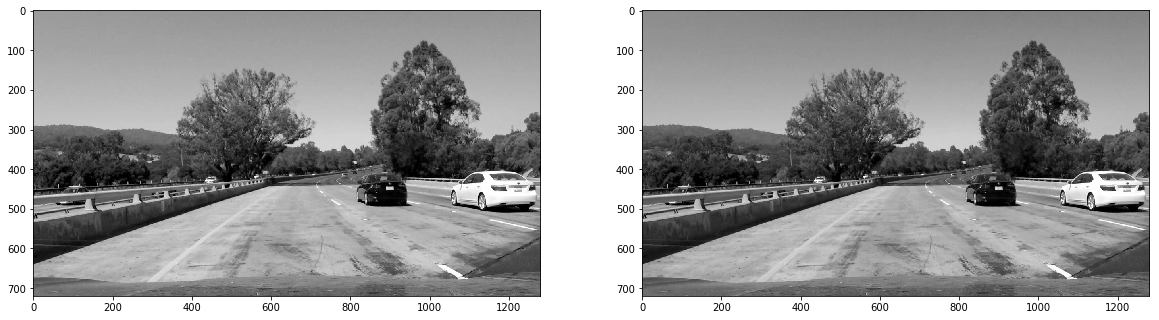

In [45]:
lab = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)

f, axarr = plt.subplots(1,2, figsize=(20,10))
axarr[0].imshow(lab[:,:,0], cmap='gray')
axarr[1].imshow(gray, cmap='gray')

print(gray)
print(lab[:,:,0])

In [82]:

# this code is just working for single image, it is just to give you a gist

from __future__ import print_function
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Conv2DTranspose
from keras import backend as K

batch_size = 1
#num_classes = 256
epochs = 5

# input image dimensions
img_rows, img_cols = 256, 256

# the data, split between train and test sets
#image1 = cv2.cvtColor(mpimg.imread('test_images/test1.jpg'), cv2.COLOR_RGB2LAB)
image2 = cv2.cvtColor(mpimg.imread('test_images/test2.jpg'), cv2.COLOR_RGB2LAB)
image2 = cv2.resize(image2,(256,256))
image3 = cv2.cvtColor(mpimg.imread('test_images/test3.jpg'), cv2.COLOR_RGB2LAB)
image3 = cv2.resize(image3,(256,256))
#image4 = cv2.cvtColor(mpimg.imread('test_images/test4.jpg'), cv2.COLOR_RGB2LAB)
#image5 = cv2.cvtColor(mpimg.imread('test_images/test5.jpg'), cv2.COLOR_RGB2LAB)
#image6 = cv2.cvtColor(mpimg.imread('test_images/test6.jpg'), cv2.COLOR_RGB2LAB)
(x_train, y_train)  = image2[:,:,0],image2[:,:,1:]
(x_test, y_test) = image3[:,:,0],image3[:,:,1:]

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(1, img_rows, img_cols, 1) #do changes here
    x_test = x_test.reshape(1, img_rows, img_cols, 1) #do changes here
    input_shape = (img_rows, img_cols, 1)
    y_train = y_train.reshape(1, img_rows, img_cols, 2) #do changes here
    y_test = y_test.reshape(1, img_rows, img_cols, 2) #do changes here

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
#x_train /= 255
#x_test /= 255
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
#y_train = keras.utils.to_categorical(y_train, num_classes)
#y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), strides=(2, 2),
                 activation='relu',
                 input_shape=input_shape))

model.add(Conv2D(128, (3, 3), strides=(2, 2), activation='relu'))
model.add(Conv2D(256, (3, 3), strides=(2, 2), activation='relu'))
model.add(Conv2D(512, (3, 3), activation='relu',padding = "SAME"))
model.add(Conv2D(512, (3, 3), activation='relu',padding = "SAME"))
model.add(Conv2DTranspose(256, (4, 4), strides=(2, 2), activation='relu'))
model.add(Conv2DTranspose(128, (2, 2), strides=(2, 2), activation='relu'))
model.add(Conv2DTranspose(64, (2, 2), strides=(2, 2), activation='relu'))
model.add(Conv2D(2, (1,1)))


model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(lr=0.001),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          #batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

save_filename = 'coloriser_trained_model.h5'
model.save_weights(save_filename)

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


x_train shape: (1, 256, 256, 1)
x_test shape: (1, 256, 256, 1)
1 train samples
1 test samples
Train on 1 samples, validate on 1 samples
Epoch 1/5
1/1 [==============================] - 2s 2s/step - loss: 737.6866 - acc: 0.5227 - val_loss: 612.6678 - val_acc: 0.4212
Epoch 2/5
1/1 [==============================] - 0s 185ms/step - loss: 617.8870 - acc: 0.4393 - val_loss: 606.3885 - val_acc: 0.4312
Epoch 3/5
1/1 [==============================] - 0s 168ms/step - loss: 612.1420 - acc: 0.4468 - val_loss: 193.0377 - val_acc: 0.8507
Epoch 4/5
1/1 [==============================] - 0s 167ms/step - loss: 194.5822 - acc: 0.7677 - val_loss: 189.6201 - val_acc: 0.8507
Epoch 5/5
1/1 [==============================] - 0s 164ms/step - loss: 191.2063 - acc: 0.7677 - val_loss: 186.9621 - val_acc: 0.8507
Test loss: 186.96214294433594
Test accuracy: 0.8507232666015625
